In [ ]:
#implementation of a decision tree with iris dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name = '/content/iris.csv'

In [ ]:
import pandas as pd
iris = pd.read_csv(file_name)

In [ ]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
# import some data to play with
iris = pd.read_csv('iris.csv',index_col=0)

In [ ]:
iris = iris.rename(columns={"Species":"Flowers_types"})

In [ ]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Flowers_types
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [ ]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Flowers_types']= label_encoder.fit_transform(iris['Flowers_types'])
iris['Flowers_types']

,Flowers_types
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


In [ ]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [ ]:
x=iris.iloc[:,0:4]
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [ ]:
y=iris['Flowers_types']
y

,Flowers_types
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


In [ ]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [ ]:
y

,Flowers_types
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


In [ ]:
iris['Flowers_types'].unique()

array([0, 1, 2])

In [ ]:
iris.Flowers_types.value_counts()

,count
Flowers_types,
0,50
1,50
2,50


In [ ]:
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Flowers_types']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
74,6.1,2.8,4.7,1.2
19,5.7,3.8,1.7,0.3
119,7.7,2.6,6.9,2.3
79,6.0,2.9,4.5,1.5
77,6.8,2.8,4.8,1.4
32,5.4,3.4,1.5,0.4
65,5.6,2.9,3.6,1.3
142,6.9,3.1,5.1,2.3
69,6.2,2.2,4.5,1.5
83,5.8,2.7,3.9,1.2


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'entropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]')]

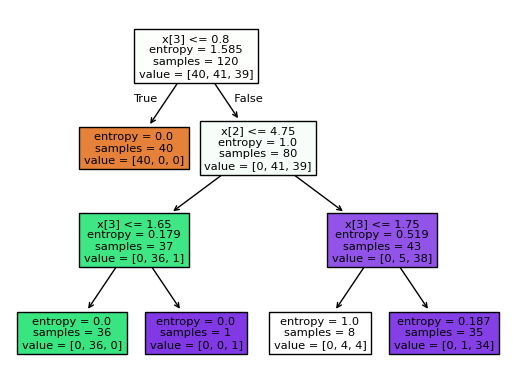

In [ ]:
from sklearn.tree import plot_tree

# Assuming 'model' is your trained DecisionTreeClassifier
plot_tree(model, filled=True)


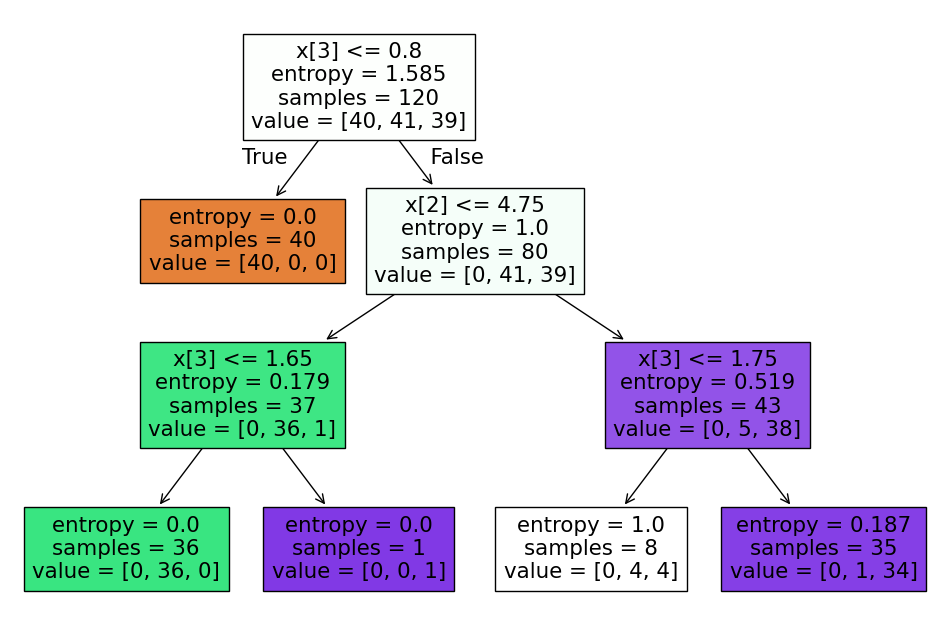

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True)
plt.show()


In [ ]:
from sklearn.tree import plot_tree

tree.plot_tree(model)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

Building Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
preds = model_gini.predict(x_test)
print(preds) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


,count
2,11
0,10
1,9


In [ ]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

1.0

Decision Tree Regression Example


In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

0.8555498859406891

,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)